In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io, fft, eye
from scipy.io import wavfile

## Input preprocessing

### File input

Sampling rate: 16000Hz
Audio length:
               53556 samples
               3.34725 seconds
Max value:     2635
Min value:     -1516


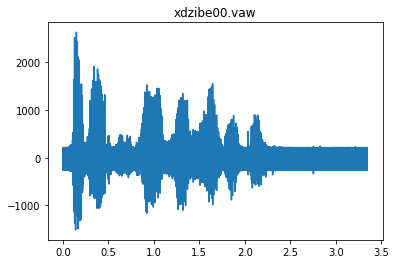

In [4]:
samplingRate, rawData = io.wavfile.read('../audio/xdzibe00.wav')
#Get info about our signal
print('Sampling rate: ' + str(samplingRate) + 'Hz')
print('Audio length:')
print('               ' + str(rawData.size) + ' samples')
print('               ' + str(rawData.size / samplingRate) + ' seconds')
print('Max value:     ' + str(rawData.max()))
print('Min value:     ' + str(rawData.min()))
#Plotting our signal
plt.figure(1)
plt.title('xdzibe00.wav')
plt.xlabel('time [s]')
plt.ylabel('value')
Time = np.linspace(0, len(rawData) / samplingRate, num=len(rawData))
plt.plot(Time, rawData)
plt.show()

### Normalization and segmentation

TypeError: object of type 'numpy.float64' has no len()

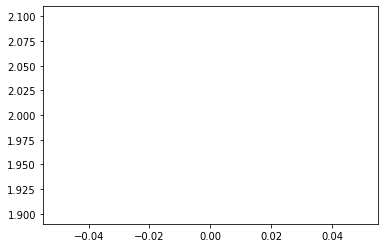

In [5]:
#normalize the data
normData = rawData / np.linalg.norm(rawData)
#slice into 1024 sample long frames, with 512 sample overlap
slicedData = np.zeros(shape=(int(normData.size / 512),1024))
for i in range(0, int(normData.size / 512) - 1): #the last frame would be incomplete so we ignore it
    slicedData[i] = normData[i * 512:(i * 512) + 1024]
#Plotting a selected frame
plt.plot(2)
Time = np.linspace(0, len(normData[10]) / samplingRate, num=normData[10].size)
plt.plot(Time, normData[10])
plt.show()

## Fourier transform


### Custom implementation

In [8]:
def customDFT(signal):
    dftMatrix = fft(eye(1024))
    return dftMatrix * signal

In [9]:
#now we can feed the function with our signal

### Comparison with a library implementation

In [10]:
#or just use a library implementation
dftLibrary = np.zeros(shape=(slicedData.shape))
for i in range(0, dftLibrary.shape[0]):
    dftLibrary[i] = np.abs(fft.fft(slicedData[i]))

## Spectrum analysis

### Spectogram

In [13]:
spectrum = np.zeros(shape=(slicedData.shape))
for i in range(0, spectrum.shape[0]):
    for k in range(0, spectrum.shape[1]):
        spectrum[i][k] = 10 * np.log10((dftLibrary[i][k] ** 2 + 1e-20) / spectrum.shape[1])

### Rogue signal generation

In [35]:
#create a 0 valued signal 3 seconds long
rogueCosines = np.zeros(3 * samplingRate)
#add the rogue frequencies
n = np.linspace(0, 3, 3 * samplingRate, False)
rogueCosines += np.cos(2 * np.pi * 700 * n)
rogueCosines += np.cos(2 * np.pi * 1400 * n)
rogueCosines += np.cos(2 * np.pi * 2100 * n)
rogueCosines += np.cos(2 * np.pi * 2800 * n)
#write the result to file
io.wavfile.write('../audio/4cos.wav', samplingRate, rogueCosines)

Now we get the spectrogram of our generated signal and compare it with our original spectrogram

## Filtration

### Filter design

### Filtration